In [6]:
pip install tensorflow matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print(tf.__version__) #for checking the version of tenserflow 

2.19.0


In [10]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


In [12]:
#building cnn model...
model = models.Sequential([
 layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
 layers.MaxPooling2D((2,2)),
 layers.Conv2D(64, (3,3), activation='relu'),
 layers.MaxPooling2D((2,2)),
 layers.Flatten(),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.8916 - loss: 0.3479 - val_accuracy: 0.9863 - val_loss: 0.0504
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9841 - loss: 0.0526 - val_accuracy: 0.9885 - val_loss: 0.0390
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9899 - loss: 0.0343 - val_accuracy: 0.9907 - val_loss: 0.0364
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9917 - loss: 0.0245 - val_accuracy: 0.9890 - val_loss: 0.0367
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9938 - loss: 0.0185 - val_accuracy: 0.9887 - val_loss: 0.0372


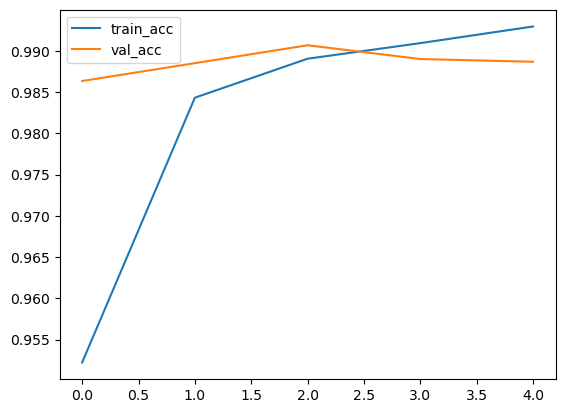

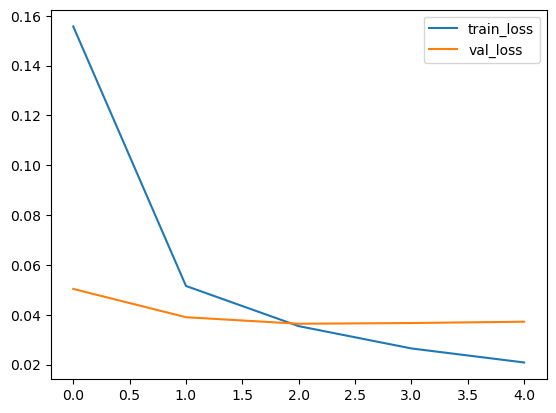

In [18]:
#ploting graphs.....
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.show()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.show()

In [20]:
#evaluating dataset.... 
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9852 - loss: 0.0483
Test accuracy: 0.989300012588501


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


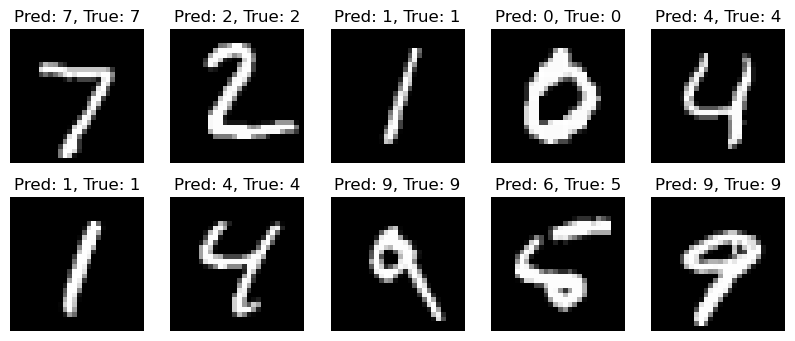

In [22]:
#time for vizualizing predications :)
import numpy as np
preds = model.predict(x_test[:10])
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f'Pred: {np.argmax(preds[i])}, True: {y_test[i]}')
    plt.axis('off')
plt.show()

In [24]:
# Summary
# 1.Preprocessed data
# 2.Built & trained a CNN
# 3.Evaluated & visualized predictions